Write a program to implement the Random Forest algorithm. Use Breast Cancer Wisconsin (Diagnostic) Dataset


MODEL PERFORMANCE (Random Forest):
Accuracy : 0.9649122807017544
Precision: 1.0
Recall   : 0.9047619047619048
F1 Score : 0.95

Confusion Matrix:
 [[72  0]
 [ 4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



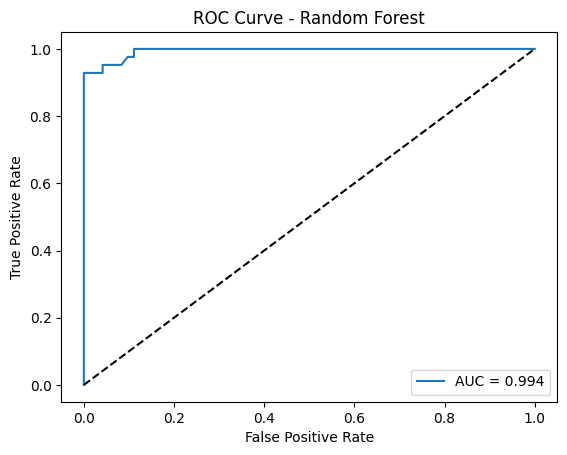

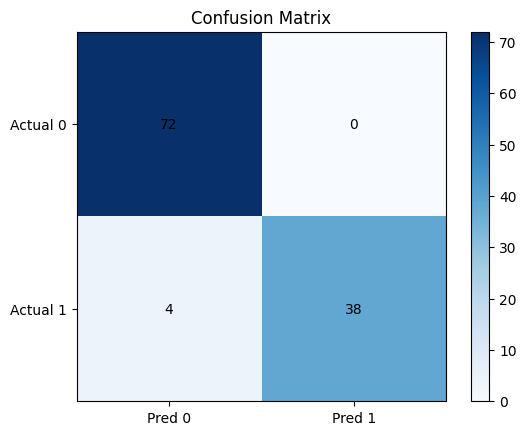

In [1]:
# ============================================
# 1️⃣ IMPORT LIBRARIES
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_curve, auc
)

# ============================================
# 2️⃣ LOAD & CLEAN THE DATASET
# ============================================
df = pd.read_csv(r"D:\B tech\Semester 5\ML\Practicals\dataset\breastcancer.csv")

# Drop unnecessary columns
if "id" in df.columns:
    df = df.drop("id", axis=1)
if "Unnamed: 32" in df.columns:
    df = df.drop("Unnamed: 32", axis=1)

# Encode target variable (Malignant=1, Benign=0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Fill missing values (if any)
df = df.fillna(df.mean(numeric_only=True))

# Split into features and target
X = df.drop("diagnosis", axis=1)
Y = df["diagnosis"]

# ============================================
# 3️⃣ TRAIN–TEST SPLIT (80% TRAIN, 20% TEST)
# ============================================
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42, stratify=Y
)

# ============================================
# 4️⃣ FEATURE SCALING (Optional but recommended)
# ============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ============================================
# 5️⃣ TRAIN RANDOM FOREST CLASSIFIER
# ============================================
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train_scaled, Y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# ============================================
# 6️⃣ EVALUATION METRICS
# ============================================
acc  = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec  = recall_score(Y_test, y_pred)
f1   = f1_score(Y_test, y_pred)
cm   = confusion_matrix(Y_test, y_pred)

print("\nMODEL PERFORMANCE (Random Forest):")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

# ============================================
# 7️⃣ ROC CURVE
# ============================================
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# ============================================
# 8️⃣ CONFUSION MATRIX HEATMAP
# ============================================
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["Actual 0", "Actual 1"])

# Add numbers to matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()
